In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import the dataset
data = pd.read_csv('E:\Machine Learning\IMT/EnglandWeather.csv')

In [3]:
#making a dataframe and calling it
df = pd.DataFrame(data)
df

,Formatted Date,Summary,Precip Type,Temperature (C),Wind Speed (km/h),Pressure (millibars),Humidity
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,14.1197,1015.13,0.89
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,14.2646,1015.63,0.86
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,3.9284,1015.94,0.89
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,14.1036,1016.41,0.83
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,11.0446,1016.51,0.83
...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,10.9963,1014.36,0.43
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,10.0947,1015.16,0.48
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,8.9838,1015.66,0.56
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,10.5294,1015.95,0.60


In [4]:
#cheking numberical features
data.describe()

,Temperature (C),Wind Speed (km/h),Pressure (millibars),Humidity
count,96453.000000,96453.000000,96453.000000,96453.000000
mean,11.932678,10.810640,1003.235956,0.734899
std,9.551546,6.913571,116.969906,0.195473
min,-21.822222,0.000000,0.000000,0.000000
25%,4.688889,5.828200,1011.900000,0.600000
50%,12.000000,9.965900,1016.450000,0.780000
75%,18.838889,14.135800,1021.090000,0.890000
max,39.905556,63.852600,1046.380000,1.000000


In [5]:
#making a new dataframe for removing illogical data
df5 = df.copy()

In [6]:
df5.drop(['Summary'], axis = 1, inplace = True)

In [7]:
df5

,Formatted Date,Precip Type,Temperature (C),Wind Speed (km/h),Pressure (millibars),Humidity
0,2006-04-01 00:00:00.000 +0200,rain,9.472222,14.1197,1015.13,0.89
1,2006-04-01 01:00:00.000 +0200,rain,9.355556,14.2646,1015.63,0.86
2,2006-04-01 02:00:00.000 +0200,rain,9.377778,3.9284,1015.94,0.89
3,2006-04-01 03:00:00.000 +0200,rain,8.288889,14.1036,1016.41,0.83
4,2006-04-01 04:00:00.000 +0200,rain,8.755556,11.0446,1016.51,0.83
...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,rain,26.016667,10.9963,1014.36,0.43
96449,2016-09-09 20:00:00.000 +0200,rain,24.583333,10.0947,1015.16,0.48
96450,2016-09-09 21:00:00.000 +0200,rain,22.038889,8.9838,1015.66,0.56
96451,2016-09-09 22:00:00.000 +0200,rain,21.522222,10.5294,1015.95,0.60


In [8]:
df2 = df

In [9]:
#removin data and see the result
df2.drop(df2.index[df2['Wind Speed (km/h)'] == 0], inplace = True)
df2.drop(df2.index[df2['Pressure (millibars)'] == 0], inplace = True)
df2.drop(df2.index[df2['Humidity'] == 0], inplace = True)
df2.describe()

,Temperature (C),Wind Speed (km/h),Pressure (millibars),Humidity
count,93885.000000,93885.000000,93885.000000,93885.000000
mean,11.970107,10.929095,1016.767184,0.733589
std,9.553990,6.823233,7.775750,0.195572
min,-21.822222,0.032200,973.780000,0.120000
25%,4.727778,6.053600,1012.080000,0.600000
50%,12.022222,10.110800,1016.510000,0.780000
75%,18.861111,14.151900,1021.120000,0.890000
max,39.905556,63.852600,1046.380000,1.000000


In [10]:
##cheking string features
df3 = pd.DataFrame(df2, columns = ["Summary", "Precip Type"])
df3.describe()

,Summary,Precip Type
count,93885,93368
unique,27,2
top,Partly Cloudy,rain
freq,31183,83024


In [11]:
#removing the 'nan' values of 'Precip Type' coloumn
#df2.unique()
df2 = df2.dropna(subset = ['Precip Type'])

In [12]:
df3 = pd.DataFrame(df2, columns = ["Summary", "Precip Type"])
df3.describe()

,Summary,Precip Type
count,93368,93368
unique,27,2
top,Partly Cloudy,rain
freq,31085,83024


In [13]:
df2.isnull().sum()

Formatted Date          0
Summary                 0
Precip Type             0
Temperature (C)         0
Wind Speed (km/h)       0
Pressure (millibars)    0
Humidity                0
dtype: int64

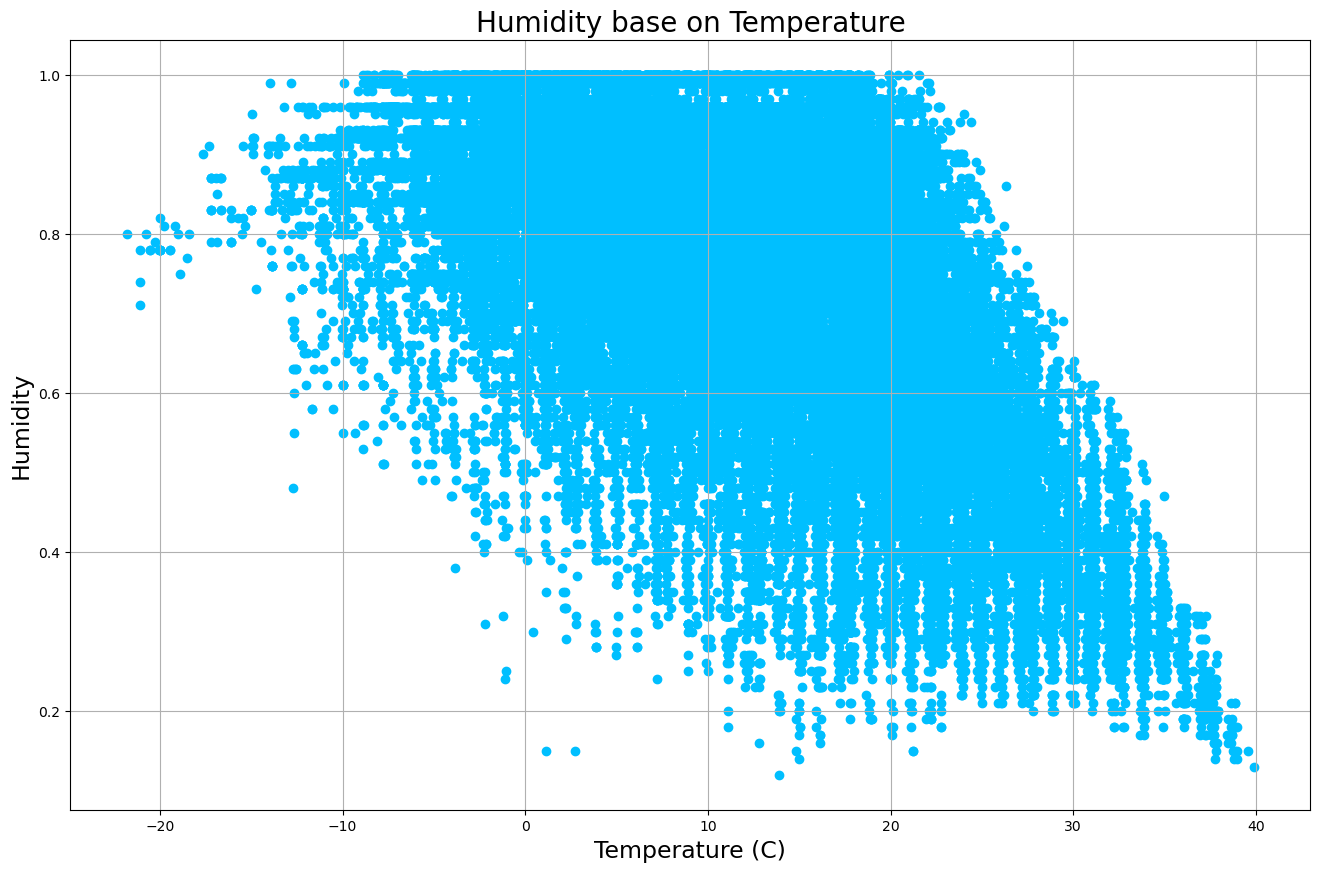

In [14]:
#Humidity base on Temperature plot
plt.figure(figsize = (16, 10))
plt.scatter(df2["Temperature (C)"],df2["Humidity"] , color = 'deepskyblue')
plt.title("Humidity base on Temperature", fontsize = 20)
plt.xlabel('Temperature (C)', fontsize = 17)
plt.ylabel('Humidity', fontsize = 17)
plt.grid()

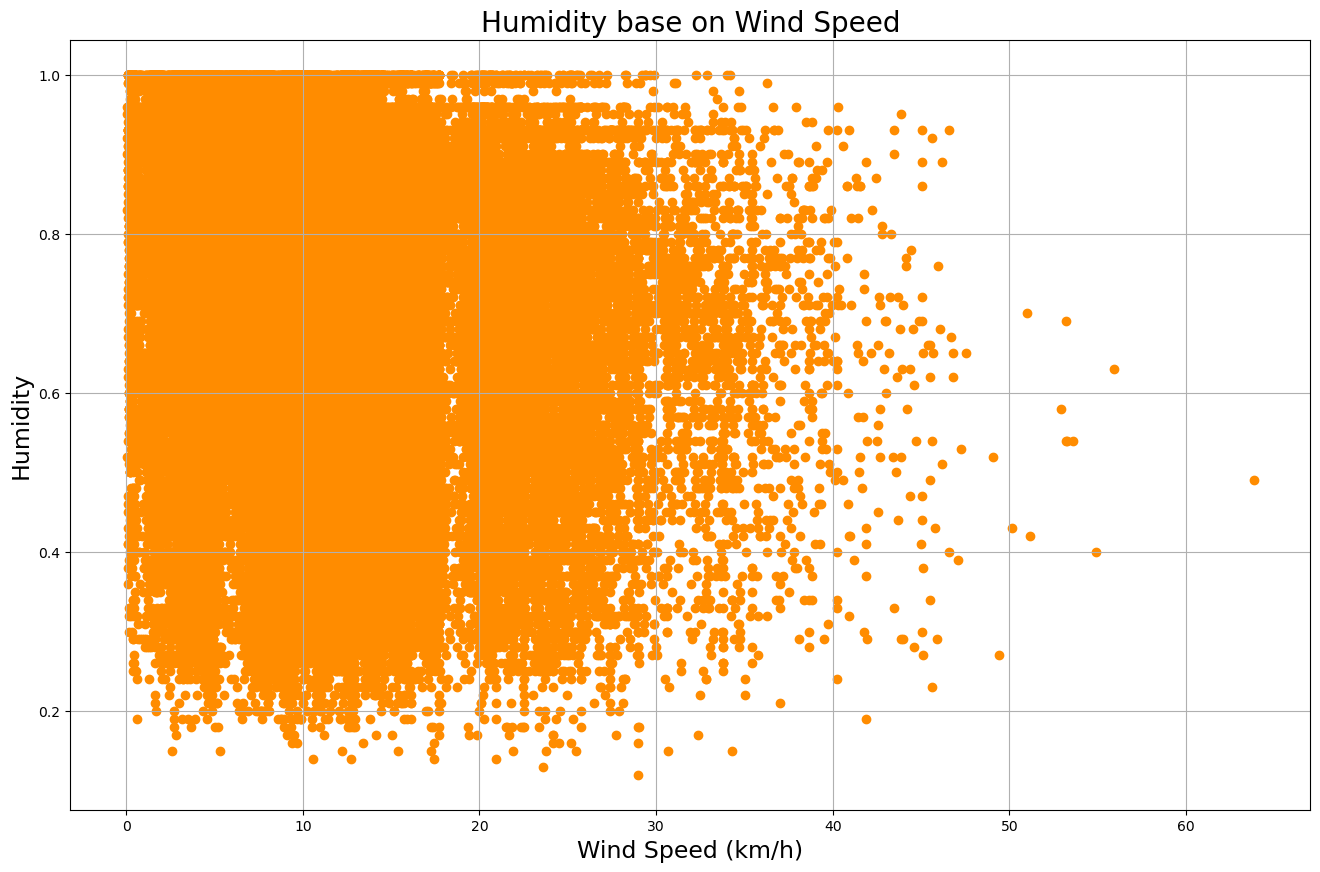

In [15]:
#Humidity base on Wind Speed plot
plt.figure(figsize = (16, 10))
plt.scatter(df2["Wind Speed (km/h)"], df2["Humidity"], color = 'darkorange')
plt.title("Humidity base on Wind Speed", fontsize = 20)
plt.xlabel('Wind Speed (km/h)', fontsize = 17)
plt.ylabel('Humidity', fontsize = 17)
plt.grid()
#plt.savefig('F:/bagher/plot.png')

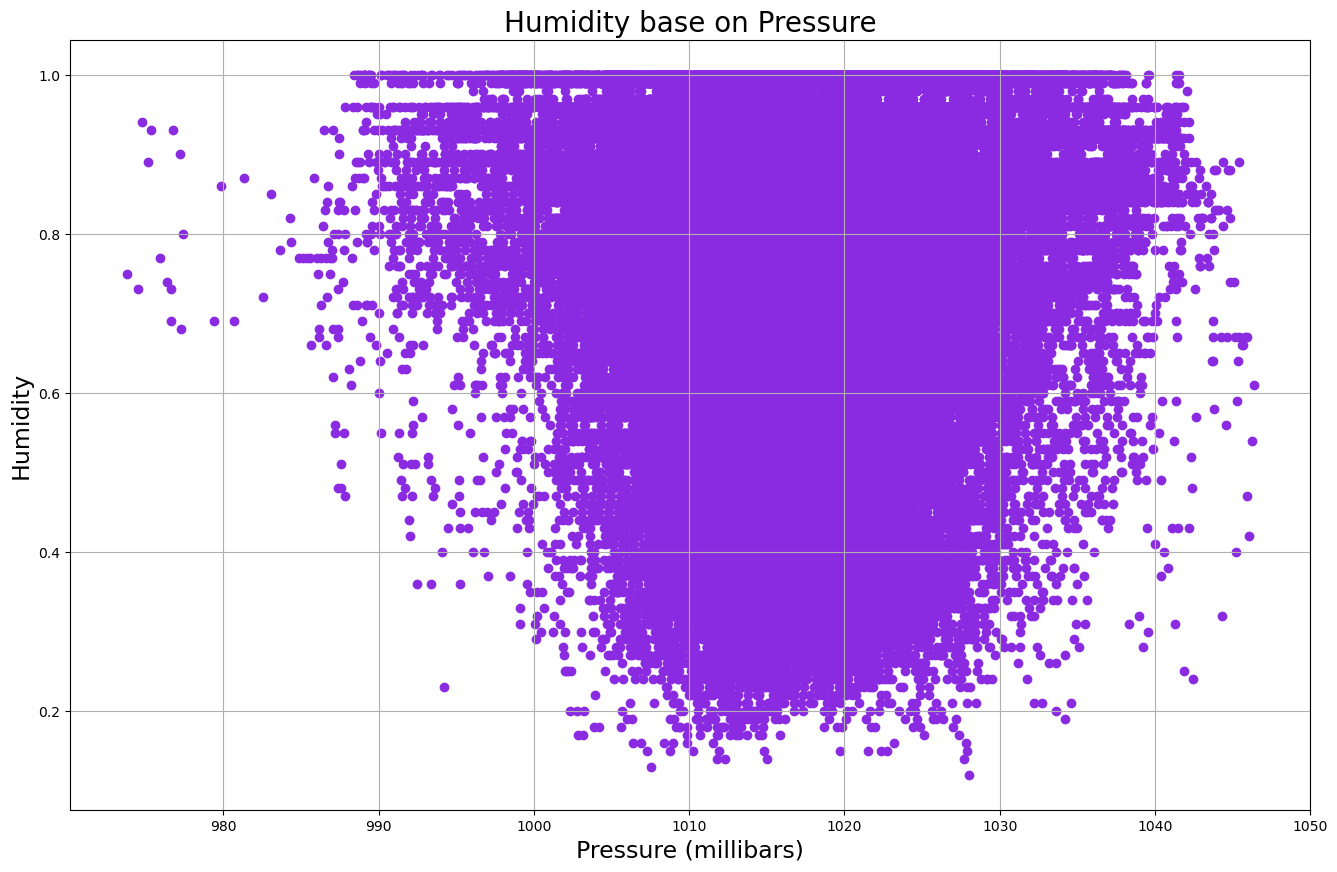

In [16]:
#Humidity base on Pressure
plt.figure(figsize = (16, 10))
plt.scatter(df2["Pressure (millibars)"], df2["Humidity"], color = 'blueviolet')
plt.title("Humidity base on Pressure", fontsize = 20)
plt.xlabel('Pressure (millibars)', fontsize = 17)
plt.ylabel('Humidity', fontsize = 17)
plt.grid()
#plt.savefig('F:/bagher/plot.png')

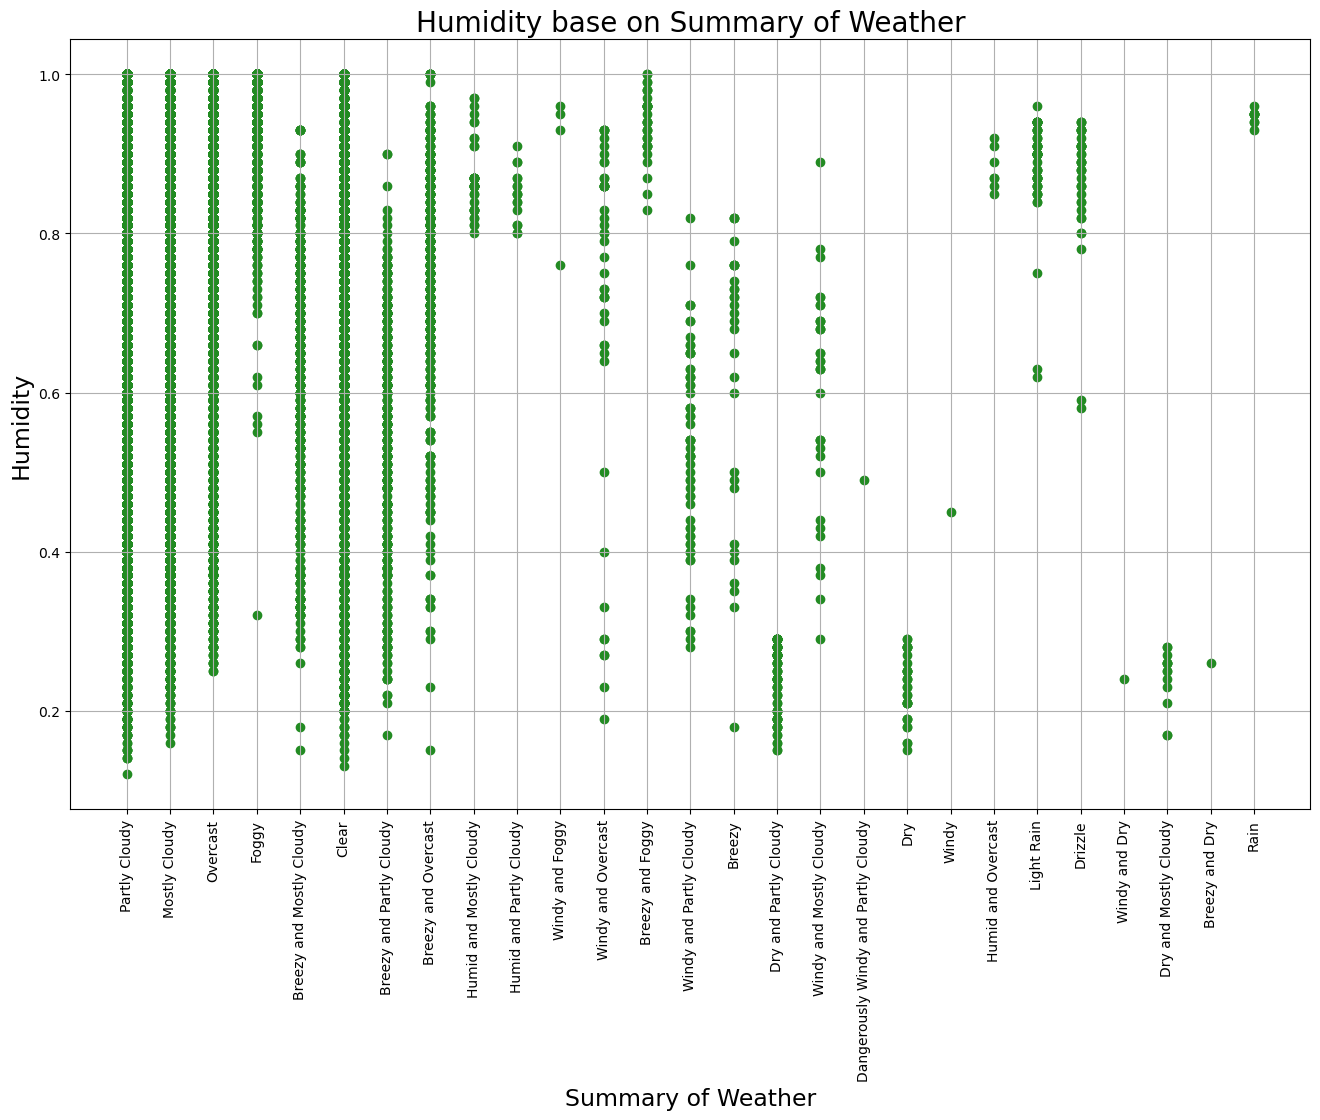

In [17]:
#Humidity base on Summary of Weather plot
plt.figure(figsize = (16, 10))
plt.xticks(rotation = 90)
plt.scatter(df2["Summary"], df2["Humidity"], color = 'forestgreen')
plt.title("Humidity base on Summary of Weather", fontsize = 20)
plt.xlabel('Summary of Weather', fontsize = 17)
plt.ylabel('Humidity', fontsize = 17)
plt.grid()

<AxesSubplot:>

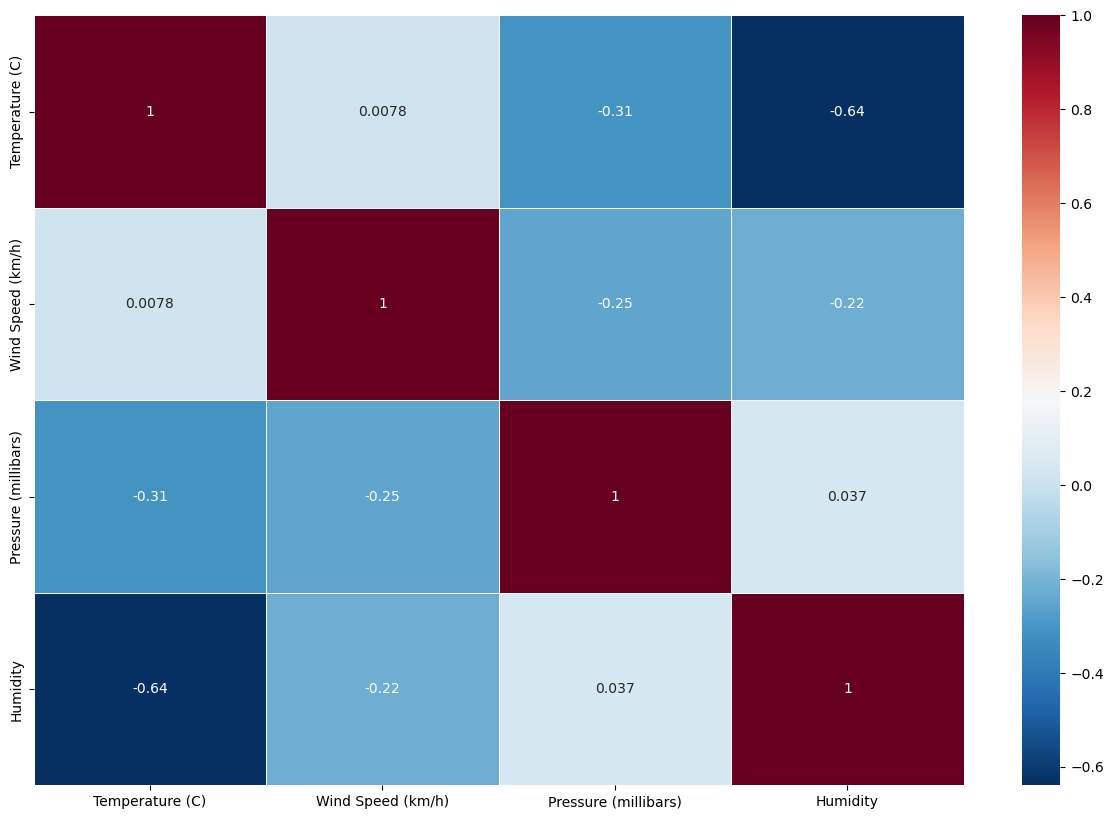

In [18]:
plt.figure(figsize = (15, 10))
sns.heatmap(df.corr(), annot = True,cbar = True, linewidths=0.5, cmap = 'RdBu_r')

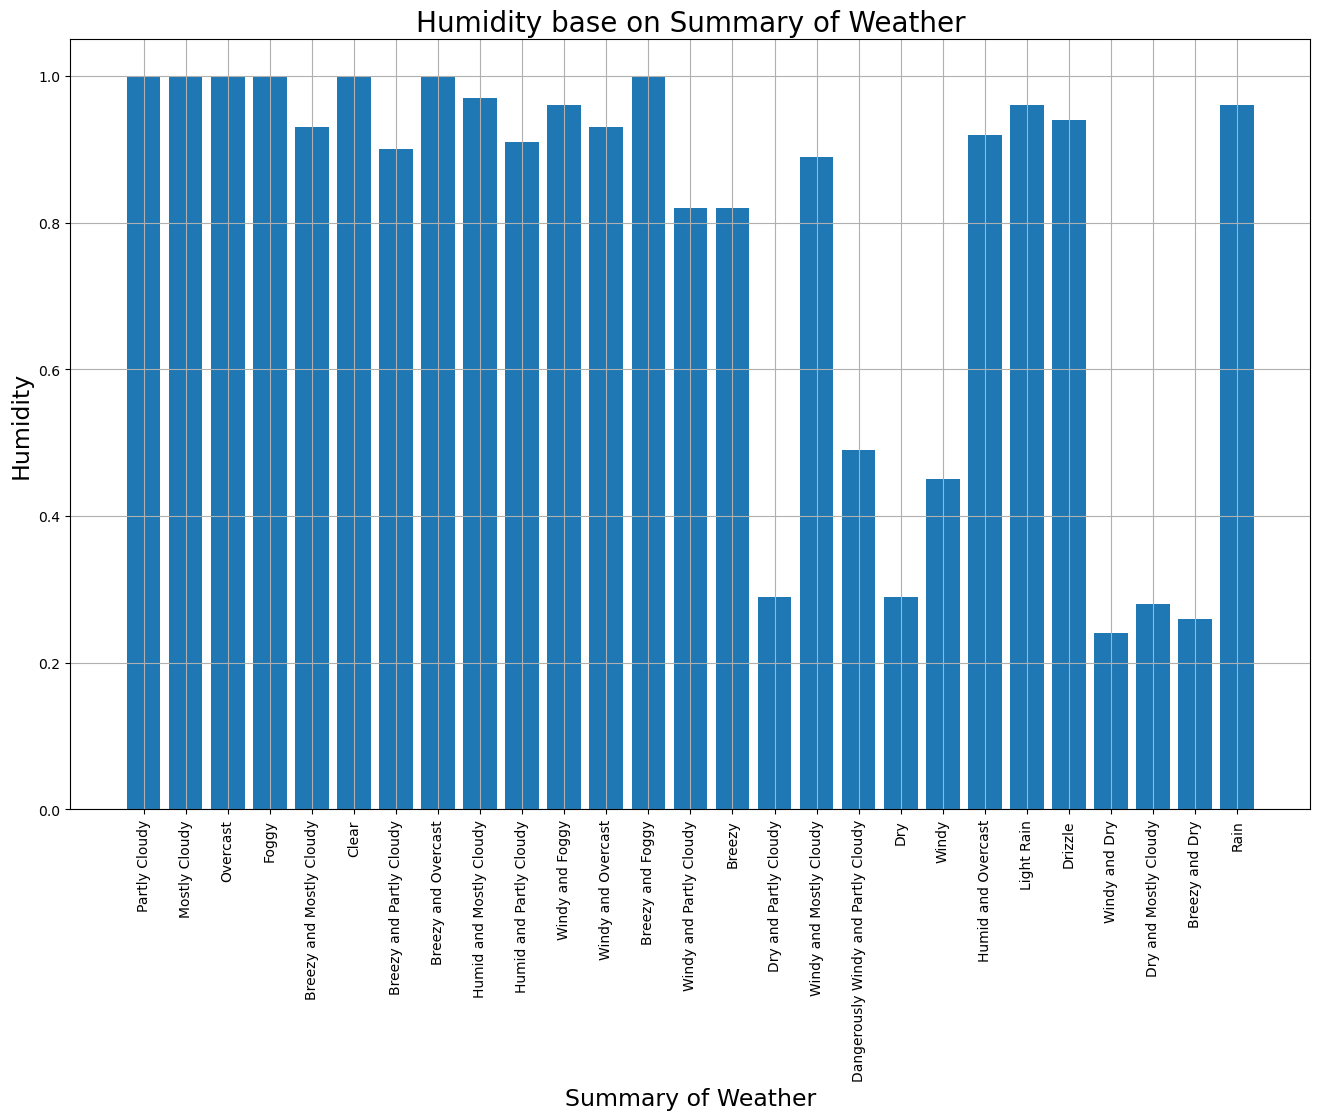

In [19]:
#Humidity base on Summary of Weather plot
plt.figure(figsize = (16, 10))
plt.xticks(rotation = 90)
plt.bar(df2["Summary"], df2["Humidity"])
plt.title("Humidity base on Summary of Weather", fontsize = 20)
plt.xlabel('Summary of Weather', fontsize = 17)
plt.ylabel('Humidity', fontsize = 17)
plt.grid()

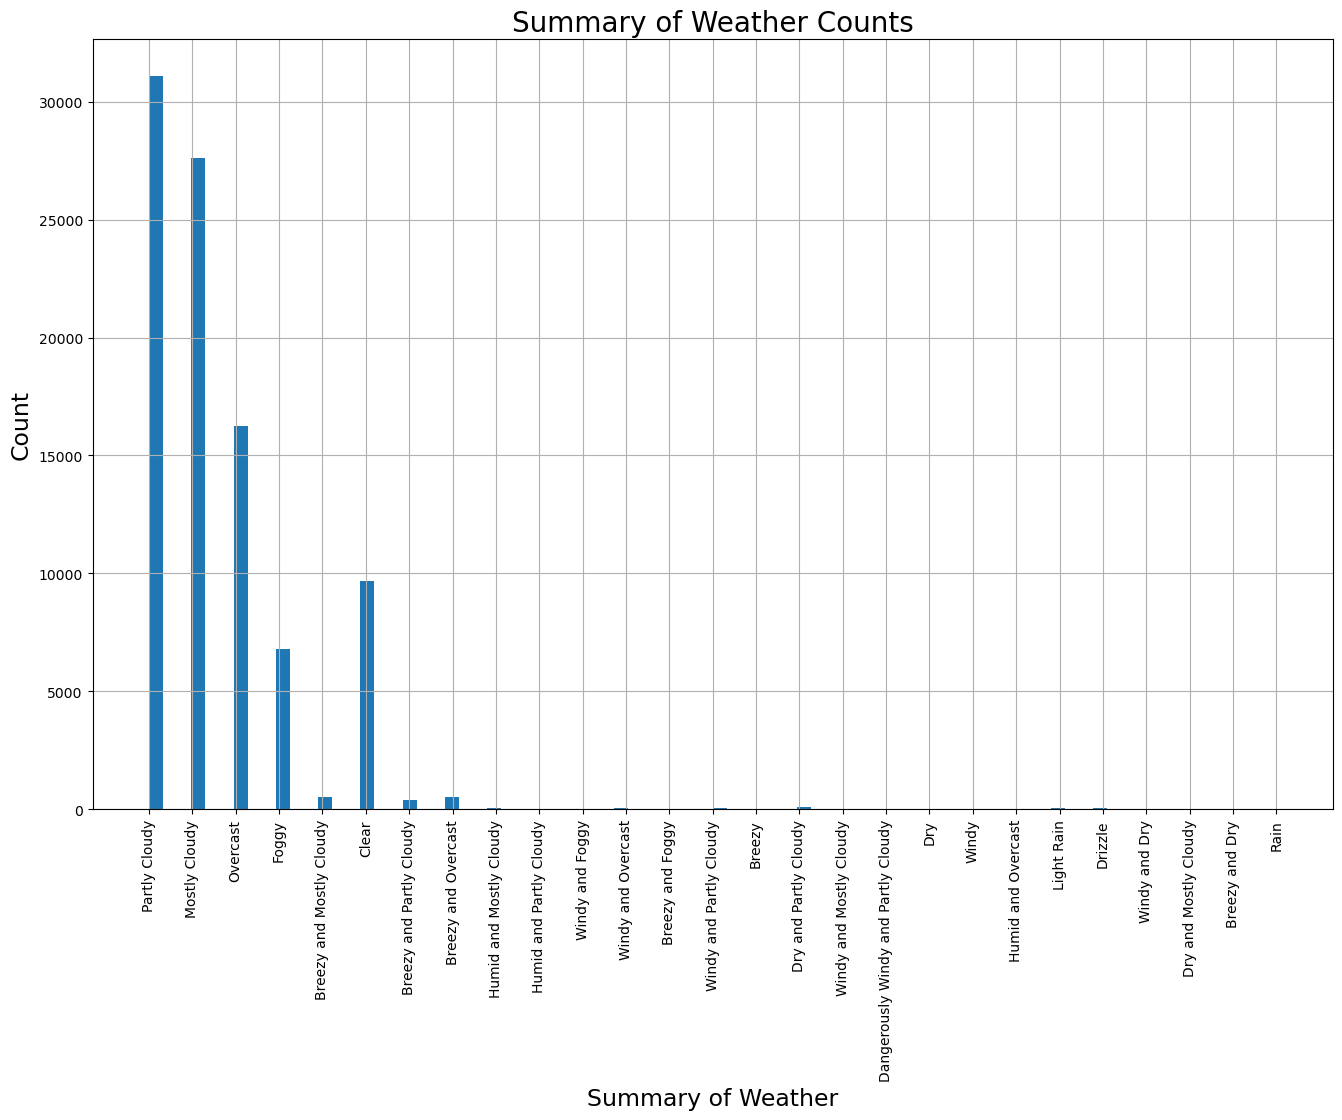

In [21]:
#Humidity base on Summary of Weather plot
plt.figure(figsize = (16, 10))
plt.xticks(rotation = 90)
plt.hist(df2["Summary"], bins = 80)
plt.title("Summary of Weather Counts", fontsize = 20)
plt.xlabel('Summary of Weather', fontsize = 17)
plt.ylabel('Count', fontsize = 17)
plt.grid()

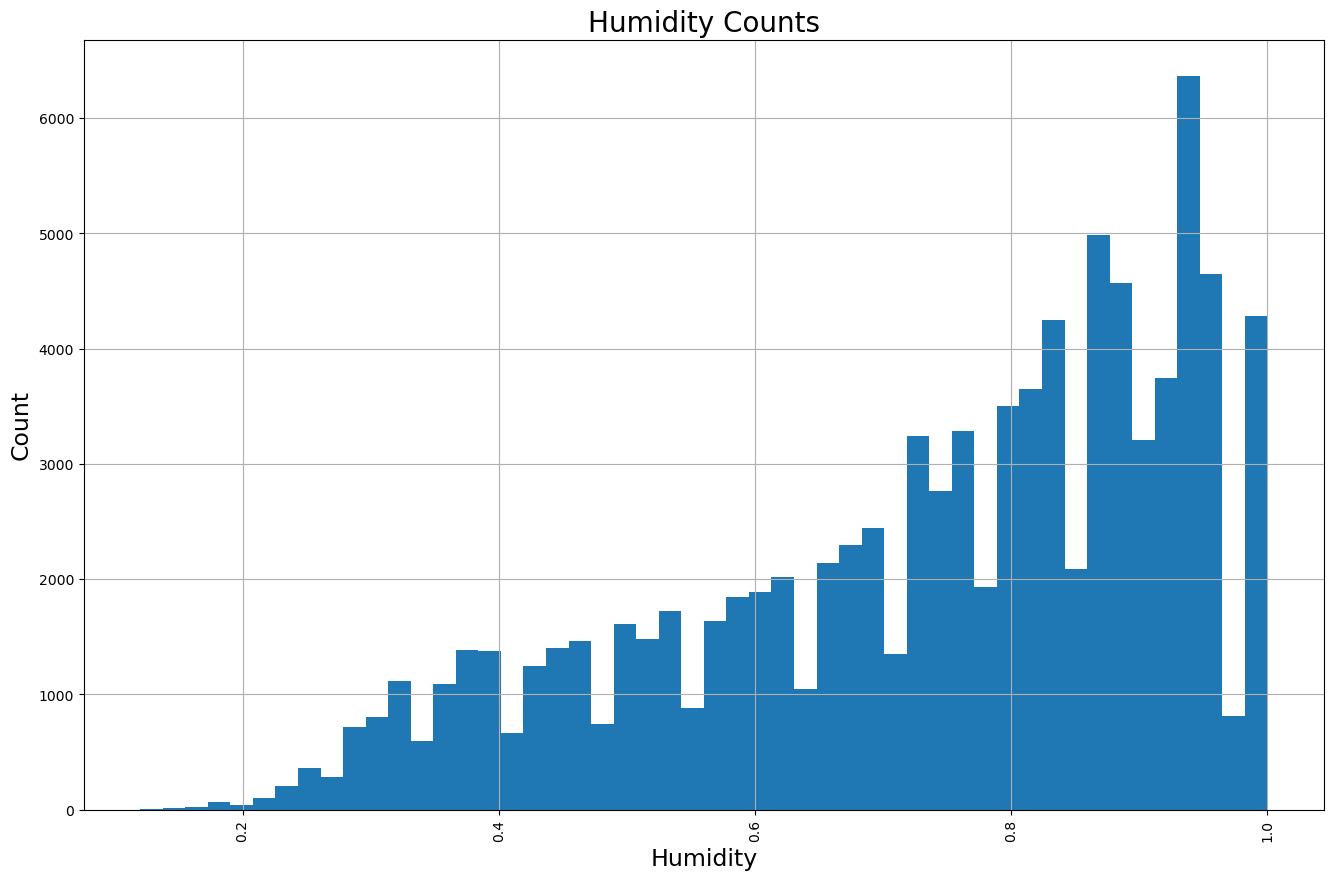

In [22]:
#Humidity base on Summary of Weather plot
plt.figure(figsize = (16, 10))
plt.xticks(rotation = 90)
plt.hist(df2["Humidity"], bins = 50)
plt.title("Humidity Counts", fontsize = 20)
plt.xlabel('Humidity', fontsize = 17)
plt.ylabel('Count', fontsize = 17)
plt.grid()

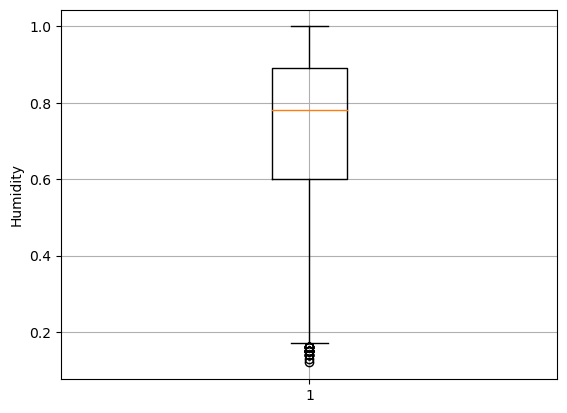

In [23]:
plt.boxplot(df2.Humidity)
plt.ylabel('Humidity')
plt.grid()
plt.show()

In [25]:
#making a new dataframe for correcting the time format for timeserie plots
df4 = df.copy()

In [26]:
#correcting the time format
df4['Formatted Date'] = pd.to_datetime(df4['Formatted Date'], utc = True).dt.date
df4

,Formatted Date,Summary,Precip Type,Temperature (C),Wind Speed (km/h),Pressure (millibars),Humidity
0,2006-03-31,Partly Cloudy,rain,9.472222,14.1197,1015.13,0.89
1,2006-03-31,Partly Cloudy,rain,9.355556,14.2646,1015.63,0.86
2,2006-04-01,Mostly Cloudy,rain,9.377778,3.9284,1015.94,0.89
3,2006-04-01,Partly Cloudy,rain,8.288889,14.1036,1016.41,0.83
4,2006-04-01,Mostly Cloudy,rain,8.755556,11.0446,1016.51,0.83
...,...,...,...,...,...,...,...
96448,2016-09-09,Partly Cloudy,rain,26.016667,10.9963,1014.36,0.43
96449,2016-09-09,Partly Cloudy,rain,24.583333,10.0947,1015.16,0.48
96450,2016-09-09,Partly Cloudy,rain,22.038889,8.9838,1015.66,0.56
96451,2016-09-09,Partly Cloudy,rain,21.522222,10.5294,1015.95,0.60


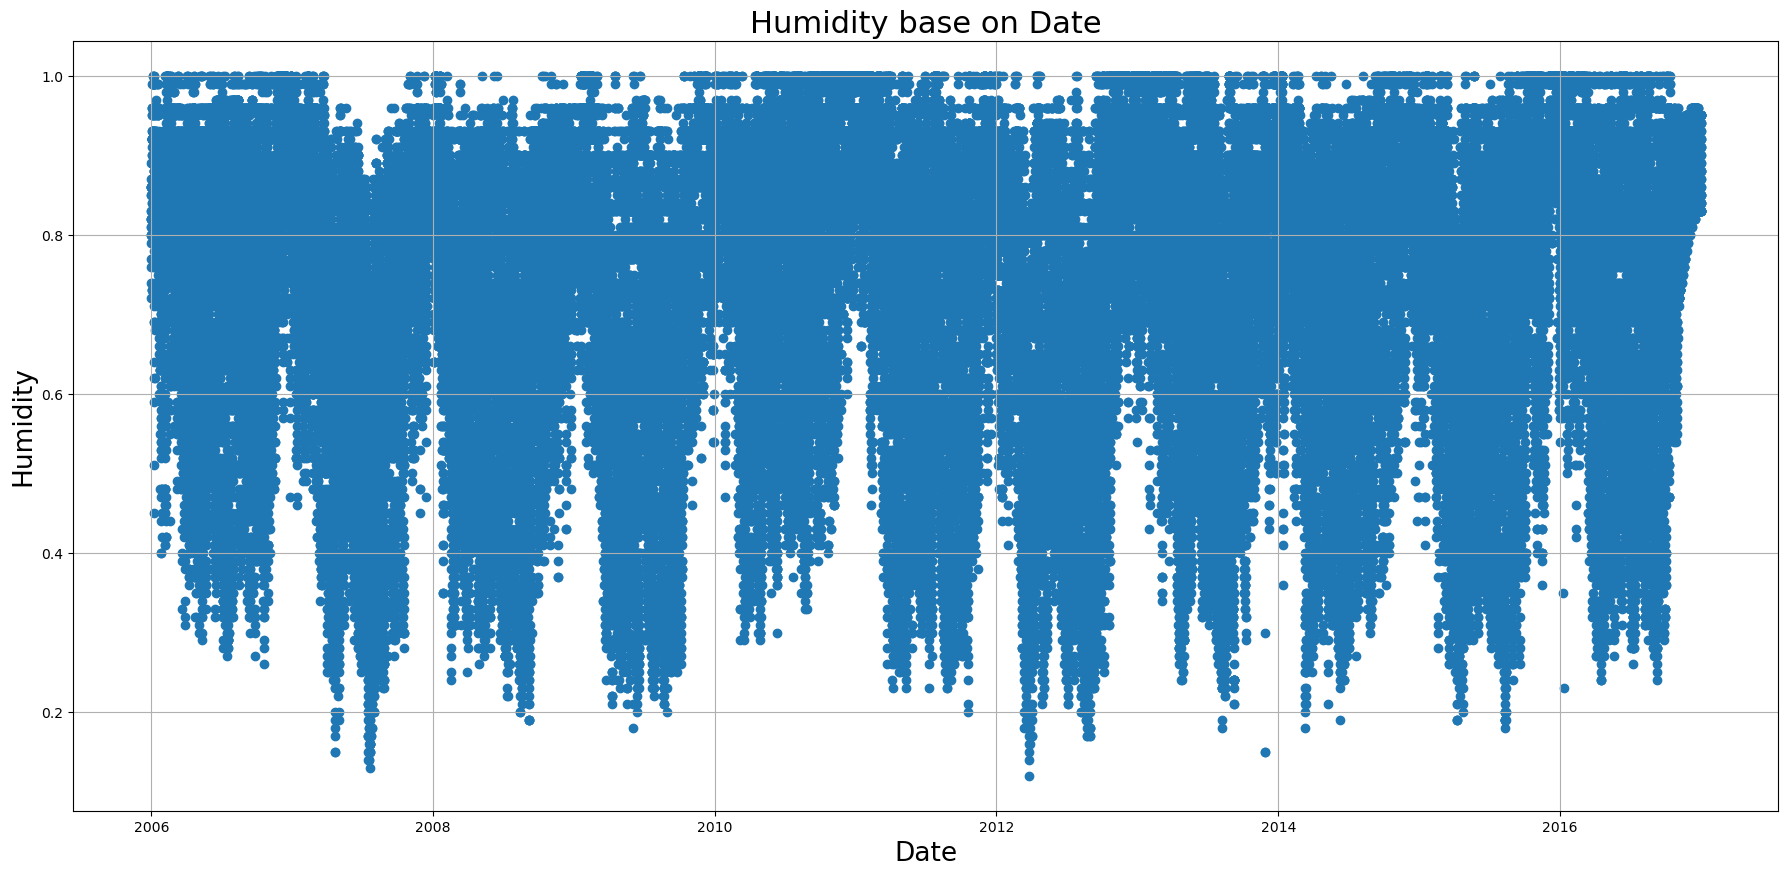

In [27]:
#Humidity base on Date plot
plt.figure(figsize = (22, 10))
plt.scatter(df4["Formatted Date"], df4["Humidity"])
plt.title("Humidity base on Date", fontsize = 22)
plt.xlabel('Date', fontsize = 19)
plt.ylabel('Humidity', fontsize = 19)
plt.grid()

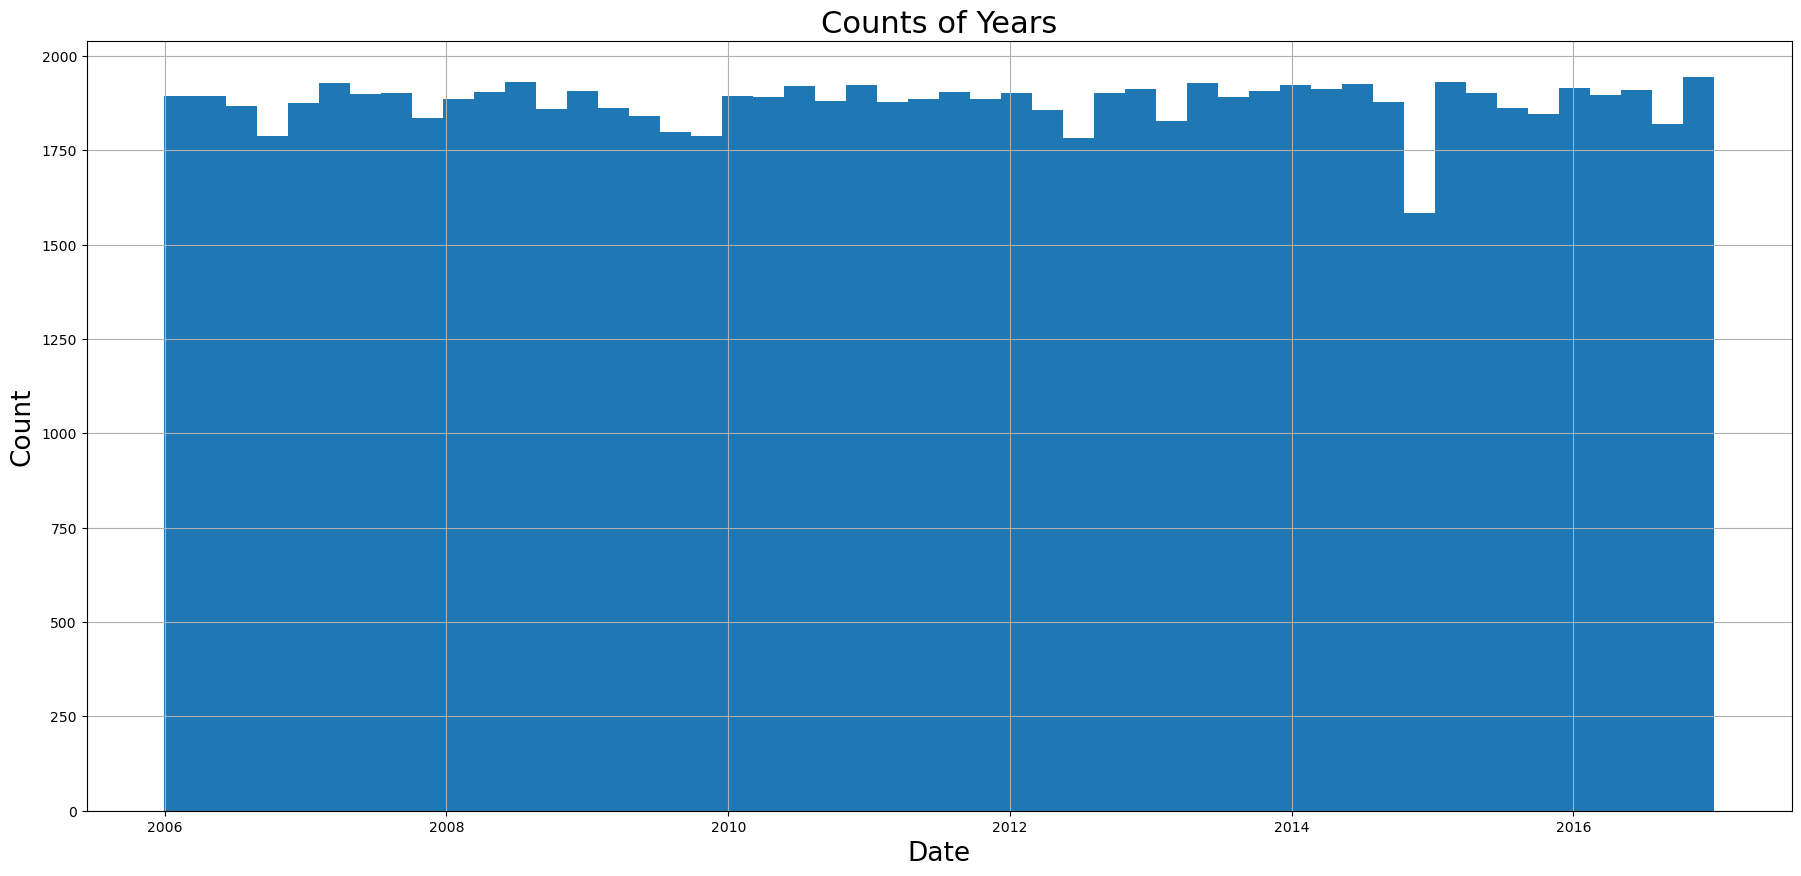

In [28]:
#Humidity base on Date plot
plt.figure(figsize = (22, 10))
plt.hist(df4["Formatted Date"], bins = 50)
plt.title("Counts of Years", fontsize = 22)
plt.xlabel('Date', fontsize = 19)
plt.ylabel('Count', fontsize = 19)
plt.grid()

In [29]:
df4['year']=pd.to_datetime(df4['Formatted Date'],utc=True).dt.year
df4['year']

0        2006
1        2006
2        2006
3        2006
4        2006
         ... 
96448    2016
96449    2016
96450    2016
96451    2016
96452    2016
Name: year, Length: 93885, dtype: int64

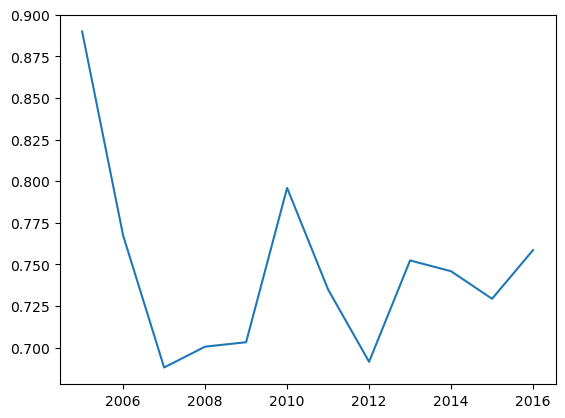

In [30]:
plt.plot(df4.groupby('year')['Humidity'].mean())

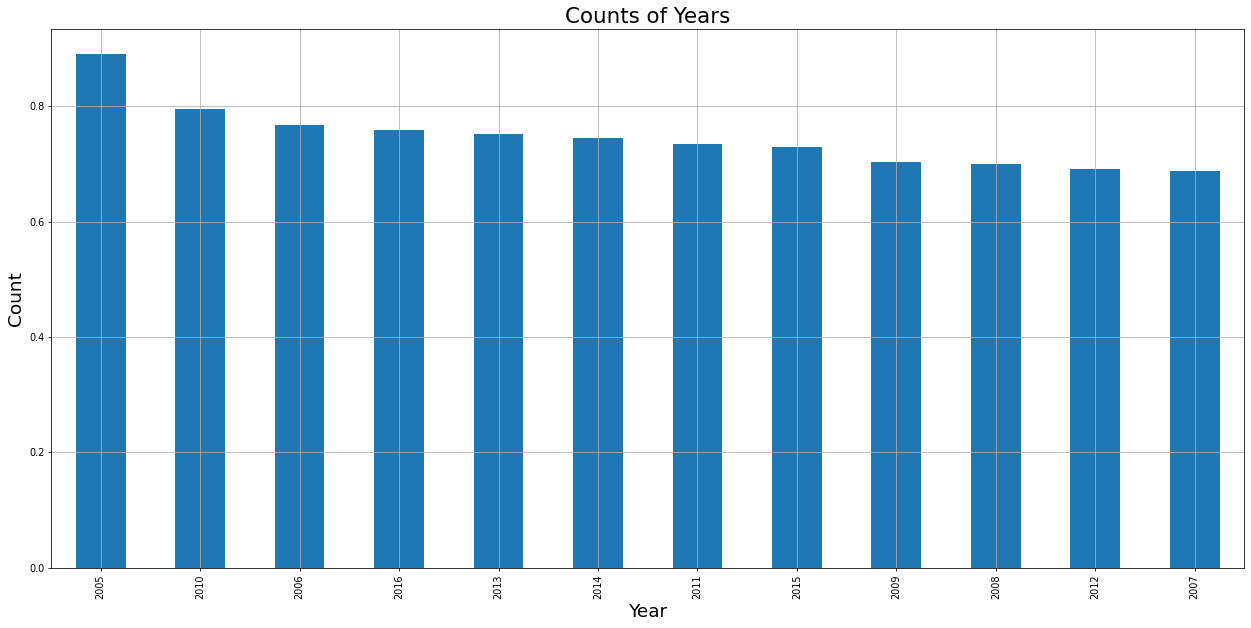

In [31]:
#Humidity base on Date plot
plt.figure(figsize = (22, 10), dpi = 70)
df4.groupby('year')['Humidity'].mean().sort_values(ascending=False).plot(kind='bar')
plt.title("Counts of Years", fontsize = 22)
plt.xlabel('Year', fontsize = 19)
plt.ylabel('Count', fontsize = 19)
plt.grid()

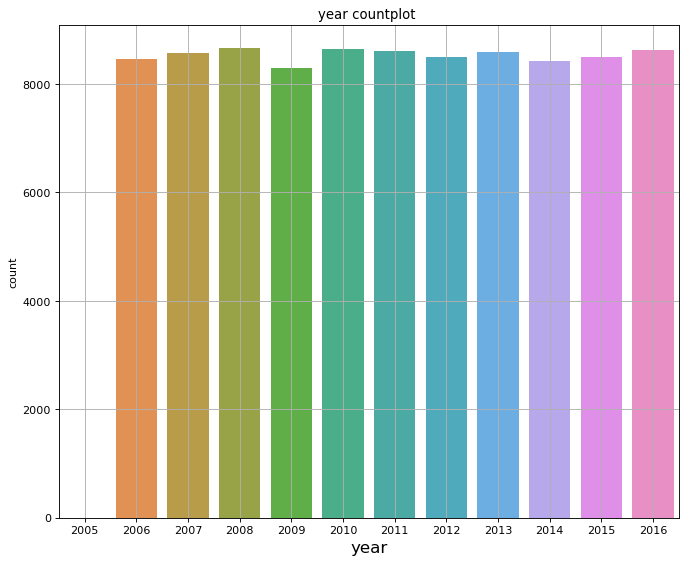

In [32]:
plt.figure(figsize=(10,8),dpi=80)
sns.countplot(x=df4["year"])
plt.xlabel('year', fontsize=15)
plt.title('year countplot ')
plt.grid()

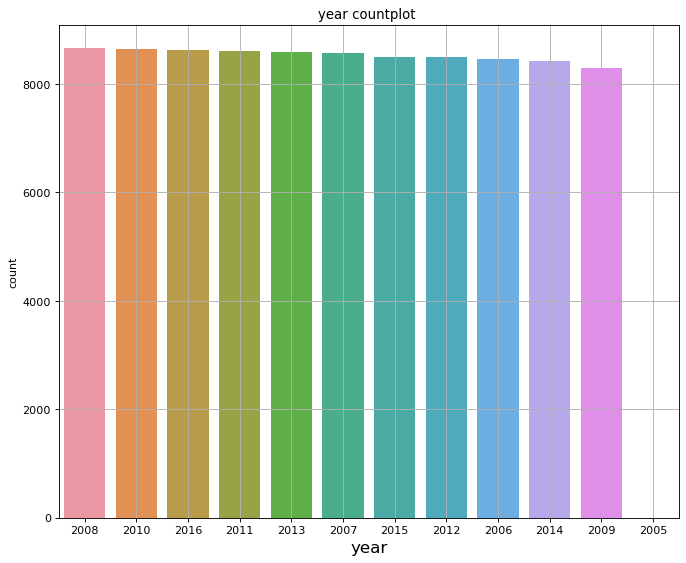

In [33]:
plt.figure(figsize=(10,8),dpi=80)
sns.countplot(x=df4["year"], order = df4['year'].value_counts().index)
plt.xlabel('year', fontsize=15)
plt.title('year countplot ')
plt.grid()

In [34]:
df4['month_name']=pd.to_datetime(df4['Formatted Date'],utc=True).dt.month_name()
df4['month_name']

0            March
1            March
2            April
3            April
4            April
           ...    
96448    September
96449    September
96450    September
96451    September
96452    September
Name: month_name, Length: 93885, dtype: object

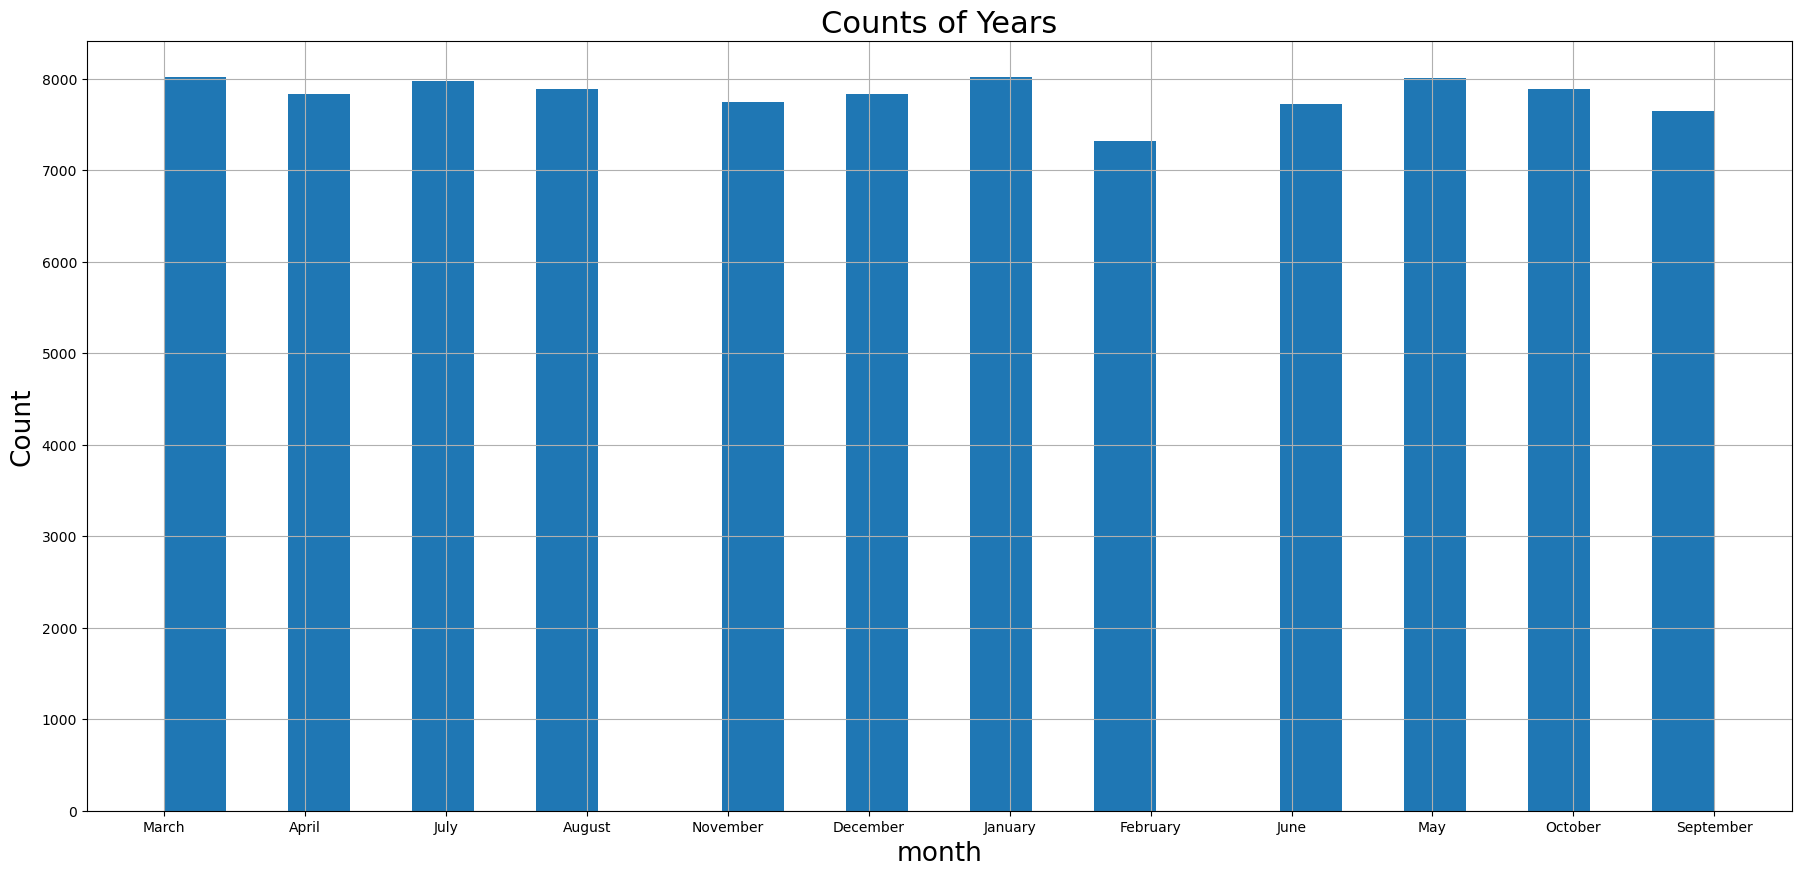

In [35]:
#Humidity base on Date plot
plt.figure(figsize = (22, 10))
plt.hist(df4["month_name"], bins = 25)
plt.title("Counts of Years", fontsize = 22)
plt.xlabel('month', fontsize = 19)
plt.ylabel('Count', fontsize = 19)
plt.grid()

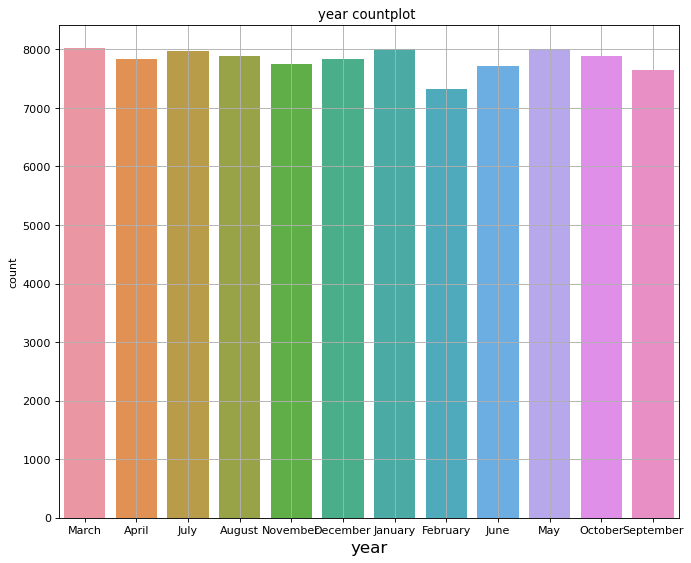

In [36]:
plt.figure(figsize=(10,8),dpi=80)
sns.countplot(x=df4["month_name"])
plt.xlabel('year', fontsize=15)
plt.title('year countplot ')
plt.grid()